### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 1

#### Дисциплина: Интеллектуальный анализ данных

##### Студент:  Гебриал Ибрам Есам Зекри
##### Группа:   НПИбд-01-18

## Москва 2021
***

### Вариант № 17

1. Считайте котировки ценных бумаг с указанными ниже тикерами за 2021 год: 

 ET       Energy Transfer LP 

 TSM    Taiwan Semiconductor Manufacturing ADR 

 VZ       Verizon Communications Inc 

и вычислите дневные доходности ценных бумаг. 

2. Определите ценную бумагу, имеющую максимальную медиану дневной доходности, и постройте график изменения ее стоимости. 

3. Для ценной бумаги, имеющей минимальную дневную доходность, постройте гистограмму для дневных доходностей. 

4. Для ценной бумаги, имеющей максимальную дисперсию дневной доходности, постройте и визуализируйте эмпирическую функцию распределения дневной доходности. 

5. Вычислите матрицу ковариации дневных доходностей ценных бумаг и для пары ценных бумаг с наиболее высокой ковариацией постройте диаграмму рассеяния стоимости ценных бумаг 

1. Считайте котировки ценных бумаг с указанными ниже тикерами за 2021 год:

In [6]:
import pandas as pd 
from pandas_datareader import data as pdr
import datetime as dt


In [7]:
def get(tickers, startdate, enddate):
    def data(ticker):
        return (pdr.get_data_yahoo(ticker, start=startdate, end=enddate))
    datas = map (data, tickers)
    return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

In [8]:
tickers = ['ET', 'TSM', 'VZ']
all_data = get(tickers, dt.datetime(2021, 1, 1), dt.datetime(2021, 12, 31))
all_data.head()

High   Low  Open  Close      Volume  Adj Close
Ticker Date                                                      
ET     2021-01-04  6.32  6.03  6.26   6.10  26710800.0   5.772168
       2021-01-05  6.60  6.08  6.10   6.46  28105700.0   6.112821
       2021-01-06  6.68  6.42  6.59   6.62  20091400.0   6.264221
       2021-01-07  6.76  6.54  6.65   6.65  15386800.0   6.292609
       2021-01-08  6.78  6.58  6.73   6.73  21695200.0   6.368309

In [9]:
daily_close_pr = all_data[['Adj Close']].reset_index().pivot('Date', 'Ticker', 'Adj Close')
daily_close_pr

Ticker,ET,TSM,VZ
Date,,,
2021-01-04,5.772168,110.402008,56.966927
2021-01-05,6.112821,111.459579,56.705570
2021-01-06,6.264221,114.266579,57.392853
2021-01-07,6.292609,120.018944,57.263702
2021-01-08,6.368309,117.310791,56.549496
...,...,...,...
2021-09-13,9.340000,123.114326,54.619999
2021-09-14,9.300000,122.586494,54.410000
2021-09-15,9.240000,121.002998,54.570000


In [10]:
daily_pct_change = daily_close_pr.pct_change()
daily_pct_change

Ticker,ET,TSM,VZ
Date,,,
2021-01-04,NaN,NaN,NaN
2021-01-05,0.059016,0.009579,-0.004588
2021-01-06,0.024768,0.025184,0.012120
2021-01-07,0.004532,0.050342,-0.002250
2021-01-08,0.012030,-0.022564,-0.012472
...,...,...,...
2021-09-13,0.004301,0.005286,0.007192
2021-09-14,-0.004283,-0.004287,-0.003845
2021-09-15,-0.006452,-0.012917,0.002941


2. Определите ценную бумагу, имеющую максимальную медиану дневной доходности, и постройте график изменения ее стоимости. 


In [17]:
mediana=daily_pct_change.median()
print(mediana)

Ticker
ET     0.002054
TSM    0.001323
VZ     0.000000
dtype: float64


Ценная бумагу, имеющую максимальную медиану дневной доходности это 'ET' со значением 0.002054

График изменения ее стоимости

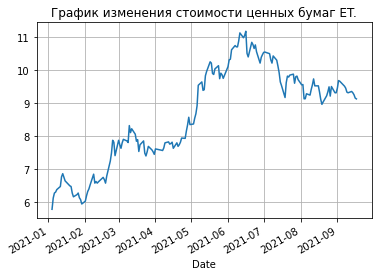

In [23]:
daily_close_pr['ET'].plot.line(grid=True,title='График изменения стоимости ценных бумаг ET.');

Для ценной бумаги, имеющей минимальную дневную доходность, постройте гистограмму для дневных доходностей.

In [24]:
minimum=daily_pct_change.min()
print(minimum)

Ticker
ET    -0.059912
TSM   -0.059403
VZ    -0.031667
dtype: float64


3.Ценной бумаги, имеющей минимальную дневную доходность это 'ET' со значением -0.059912

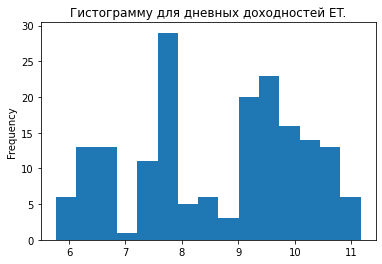

In [30]:
daily_close_pr['ET'].plot.hist(bins=15,title='Гистограмму для дневных доходностей ET.');


3. Для ценной бумаги, имеющей максимальную дисперсию дневной доходности, постройте и визуализируйте эмпирическую функцию распределения дневной доходности.

In [31]:
dispersia=daily_pct_change.std()
print(dispersia)

Ticker
ET     0.023123
TSM    0.022304
VZ     0.008674
dtype: float64


Для ценной бумаги, имеющей максимальную дисперсию дневной доходности это 'ET' со значением 0.023123 

Постройте и визуализируйте эмпирическую функцию распределения дневной доходности.

In [35]:
def ECDF(data, x):
    counter = 0
    for v in data:
        if v <= x:
            counter += 1
    return counter / len(data)

In [36]:
samples = daily_pct_change['ET']
npoints = 500
dx = (samples.max()-samples.min())/npoints

xlist = [samples.min()+dx*i for i in range(npoints)]
ylist = [ECDF(samples, x) for x in xlist]

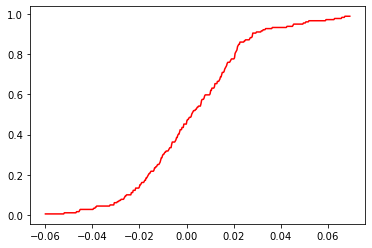

In [39]:
import matplotlib.pyplot as plt

plt.plot(xlist, ylist,'r'); # red color

5. Вычислите матрицу ковариации дневных доходностей ценных бумаг и для пары ценных бумаг с наиболее высокой ковариацией постройте диаграмму рассеяния стоимости ценных бумаг

In [42]:
daily_pct_change.cov()

Ticker,ET,TSM,VZ
Ticker,,,
ET,0.000535,0.000055,0.000030
TSM,0.000055,0.000497,-0.000014
VZ,0.000030,-0.000014,0.000075


Наиболее высокая ковариация дневных доходностей для пары разных ценных бумаг - 0.000055 (TSM и ET).

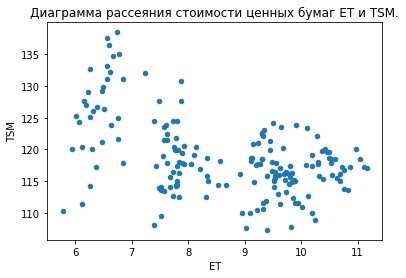

In [43]:
daily_close_pr.plot.scatter('ET','TSM',title='Диаграмма рассеяния стоимости ценных бумаг ET и TSM.');